Stany własne hamiltonianu w 1D, metoda strzałów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import trange

In [2]:
N = 100     # points
L = 100/0.05292      # [a_b] width 
dx = L/N
m0 = 1
m = 0.067*m0
hbar = 1

In [3]:
E = np.linspace(0, 35, 50000)/27211.6
Psi = np.zeros([len(E), N+1])
Psi[..., 1] = 1

C = np.zeros(len(E))

zad 1

In [4]:
# for n in trange(0, 3000):   
for j in range(len(E)):
    for i in range(1, N):
        Psi[j, i+1] =  -2*m/(hbar**2) * E[j] * dx**2 * Psi[j, i] - Psi[j, i-1] + 2*Psi[j,i]

for j in range(len(E)):
    for i in range(N+1):
        C[j] += dx * Psi[j,i]**2
        # print(C[j])

for j in range(len(E)):
    for i in range(N+1):
        Psi[j,i] = Psi[j,i]/np.sqrt(C[j])


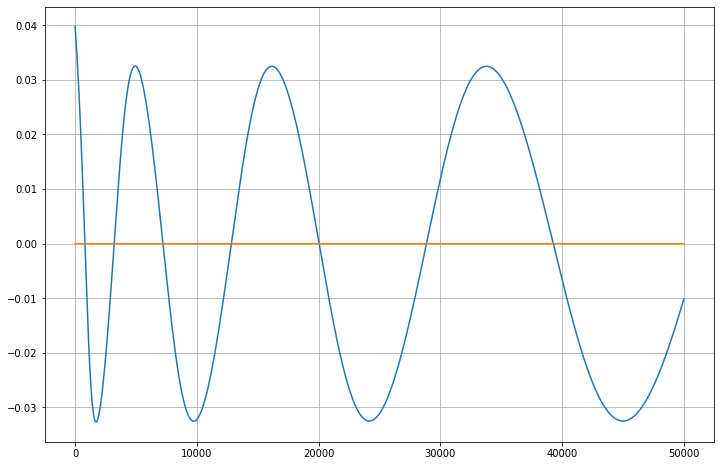

In [5]:
plt.figure(figsize=(12,8))
plt.plot(Psi[..., -1])
plt.plot([i for i in range(50000)], [0 for i in range(50000)])
plt.grid()
# plt.xlim(30000, 40000)

In [6]:
print(Psi[20000,-1])
print(Psi[20100, -1])
print(Psi[19900,-1])


0.0005248068921706164
-0.000750340655912217
0.001799140940188733


4th excited state

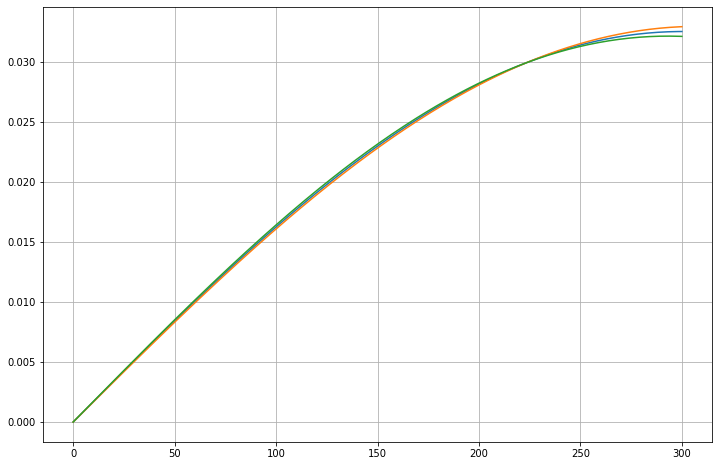

In [49]:
plt.figure(figsize=(12,8))
plt.plot(Psi[200, ...])
plt.plot(Psi[190, ...])
plt.plot(Psi[210, ...])
plt.grid()
plt.show()

In [8]:
sth = E[20000]
sth1 = sth*0.95
sth2 = sth*1.05

# print(sth1)
print(sth2)

np.where(E == sth1)
# print(E[190])
np.where(E == sth2)
# print(E[210])

0.0005402215968880963


(array([], dtype=int64),)

In [9]:
a = [600, 3000, 7000, 12000, 19500, 28000, 38000]
b = [1000, 3500, 7500, 13000, 20500, 29000, 40000]

m_bis = np.zeros(len(a))

# for n in trange(0, 3000):
for i in range(len(a)):
    while abs(E[int(a[i])] - E[int(b[i])]) > 0.001/27211.6:
        m_bis[i] = (a[i] + b[i])/2

        if Psi[int(a[i]), -1]*Psi[int(m_bis[i]), -1] < 0:
            b[i] = m_bis[i]
        
        elif Psi[int(b[i]), -1]*Psi[int(m_bis[i]), -1] < 0:
            a[i] = m_bis[i]

    

    

In [10]:
for i in range(len(m_bis)):
    m_bis[i] = int(m_bis[i])

print(m_bis)

[  802.  3208.  7215. 12827. 20041. 28856. 39272.]


In [11]:
x = np.zeros(len(m_bis))
y = np.zeros(len(m_bis))
for i in range(len(m_bis)):
    y[i] = (E[int(m_bis[i])])
    x[i] = (i+1)**2*1*np.pi**2/(2*m*L**2)
    print(y[i])
    print(x[i])

2.0631320033535862e-05
2.062693110657234e-05
8.252528013414345e-05
8.250772442628936e-05
0.00018560470578798163
0.00018564237995915105
0.00032997249634683857
0.0003300308977051574
0.0005155514772968732
0.0005156732776643085
0.0007423159238001384
0.0007425695198366042
0.0010102658358566341
0.0010107196242220447


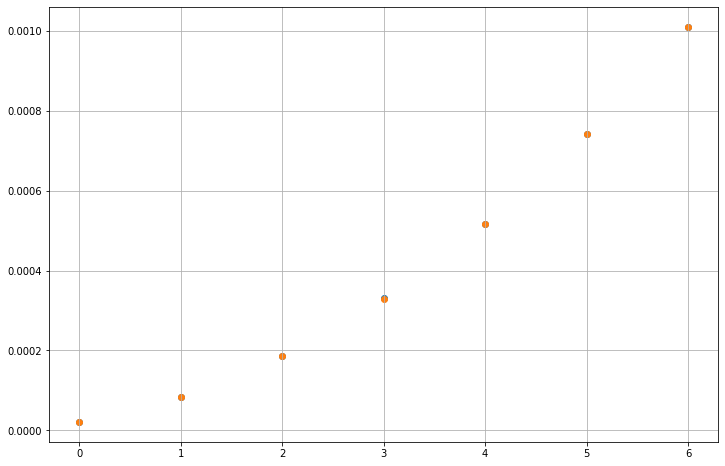

In [48]:
plt.figure(figsize=(12,8))
plt.scatter([0, 1, 2, 3, 4, 5, 6], x)
plt.scatter([0, 1, 2, 3, 4, 5, 6], y)
plt.grid()

zad3

In [89]:
W = np.linspace(0, 1500, 200)/27211.6

E_1 = np.linspace(0, 35, 200)/27211.6
Psi_1 = np.zeros([len(E_1), N+1])
Psi_1[..., 1] = 1

C_1 = np.zeros(len(E_1))
Psis = np.zeros([len(W), len(E_1)])

In [90]:
for k in range(len(W)):
    for j in range(len(E_1)):
            for i in range(1,N):
                if i == N/2:
                    Psi_1[j, i+1] =  -2*m/(hbar**2) * (E_1[j] - W[k])* dx**2 * Psi_1[j, i] - Psi_1[j, i-1] + 2*Psi_1[j,i]
                else:
                    Psi_1[j, i+1] =  -2*m/(hbar**2) * (E_1[j])* dx**2 * Psi_1[j, i] - Psi_1[j, i-1] + 2*Psi_1[j,i]
    

    for j in range(len(E_1)):
        for i in range(N+1):
            C_1[j] += dx * Psi_1[j,i]**2
            # print(C_1[j])

    for j in range(len(E_1)):
        for i in range(N+1):
            Psi_1[j,i] = Psi_1[j,i]/np.sqrt(C_1[j])
            Psis[k,j] = Psi_1[j,i]

In [81]:
Psis[1, ...]
W[1]

0.009187258375104736

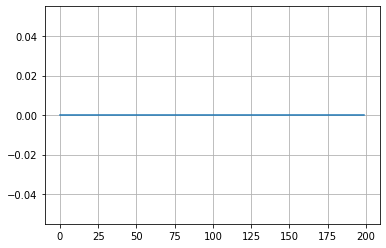

In [94]:
plt.plot(Psis[-1, ...])
plt.grid()
plt.show()

In [78]:
# plt.figure(figsize=(12,8))
# plt.plot(Psi_1[..., -1])
# # plt.plot([i for i in range(50000)], [0 for i in range(50000)])
# plt.grid()
# # plt.xlim(40000, 55000)
# # plt.ylim(-0.2e-8, 0.2e-8)

In [41]:
a_E = [500, 3000, 7000, 12000, 18000, 28000, 39000]
b_E = [1000, 3500, 7500, 15000, 22000, 30000, 39500]

m_bis_1 = np.zeros(len(a))


In [43]:
for i in range(len(a_E)):
    while abs(E_1[int(a_E[i])] - E_1[int(b_E[i])]) > 0.001/27211.6:
        m_bis_1[i] = (a_E[i] + b_E[i])/2

        if Psi_1[int(a_E[i]), -1]*Psi_1[int(m_bis_1[i]), -1] < 0:
            b_E[i] = m_bis_1[i]
        
        elif Psi_1[int(b_E[i]), -1]*Psi_1[int(m_bis_1[i]), -1] < 0:
            a_E[i] = m_bis_1[i]

In [44]:
x_1 = np.zeros(len(m_bis_1))
y_1 = np.zeros(len(m_bis_1))
for i in range(len(m_bis_1)):
    y_1[i] = (E_1[int(m_bis_1[i])])
    x_1[i] = (i+1)**2*1*np.pi**2/(2*m*L**2)
    print(y_1[i])
    print(x_1[i])

2.0605595195588813e-05
2.062693110657234e-05
8.252528013414345e-05
8.250772442628936e-05
0.00018560470578798163
0.00018564237995915105
0.0003299982211847856
0.0003300308977051574
0.0005155514772968732
0.0005156732776643085
0.0007423159238001384
0.0007425695198366042
0.0010102658358566341
0.0010107196242220447


In [80]:
# plt.figure(figsize=(12,8))
# plt.scatter(y_1, W)
# plt.grid()
# plt.show()

In [105]:
W_state = 1.5*1000/27211.6

In [110]:
E_2 = np.linspace(0, 35, 50000)/27211.6
Psi_2 = np.zeros([len(E_2), N+1])
Psi_2[..., 1] = 1

C_2 = np.zeros(len(E_2))

In [111]:
for j in range(len(E_2)):
            for i in range(1, N):
                if i == N/2: 
                    Psi_2[j, i+1] =  -2*m/(hbar**2) * (E_2[j] - W_state) * dx**2 * Psi_2[j, i] - Psi_2[j, i-1] + 2*Psi_2[j,i]
                else:
                    Psi_2[j, i+1] =  -2*m/(hbar**2) * E_2[j] * dx**2 * Psi_2[j, i] - Psi_2[j, i-1] + 2*Psi_2[j,i]


for j in range(len(E_2)):
    for i in range(N+1):
        C_2[j] += dx * Psi_2[j,i]**2
        # print(C_2[j])

for j in range(len(E_2)):
    for i in range(N+1):
        Psi_2[j,i] = Psi_2[j,i]/np.sqrt(C_2[j])

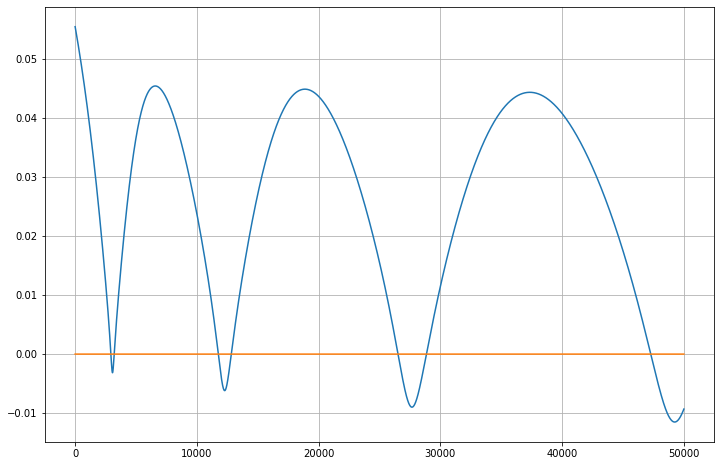

In [120]:
plt.figure(figsize=(12,8))
plt.plot(Psi_2[..., -1])
plt.plot([i for i in range(50000)], [0 for i in range(50000)])
plt.grid()
# plt.xlim(30000)
# plt.ylim(-0.2e-8, 0.2e-8)

In [129]:
a_E2 = [2700, 3000, 11000, 12000, 26000, 28000]
b_E2 = [3000, 3400, 12000, 13000, 27000, 29000]

m_bis_2 = np.zeros(len(a_E2))


In [140]:
for i in range(len(a_E2)):
    while abs(E_2[int(a_E2[i])] - E_2[int(b_E2[i])]) > 0.001/27211.6:
        m_bis_2[i] = (a_E2[i] + b_E2[i])/2

        if Psi_2[int(a_E2[i]), -1]*Psi_2[int(m_bis_2[i]), -1] < 0:
            b_E2[i] = m_bis_2[i]
        
        elif Psi_2[int(b_E2[i]), -1]*Psi_2[int(m_bis_2[i]), -1] < 0:
            a_E2[i] = m_bis_2[i]

In [131]:
x_2 = np.zeros(len(m_bis_2))
y_2 = np.zeros(len(m_bis_2))
for i in range(len(m_bis_2)):
    y_2[i] = (E_2[int(m_bis_2[i])])
    x_2[i] = (i+1)**2*1*np.pi**2/(2*m*L**2)
    print(y_2[i])
    print(x_2[i])
    # new comment
    # yet another comment

7.550239937459822e-05
2.062693110657234e-05
8.252528013414345e-05
8.250772442628936e-05
0.00030252409425733385
0.00018564237995915105
0.00032997249634683857
0.0003300308977051574
0.0006822227023558244
0.0005156732776643085
0.0007423159238001384
0.0007425695198366042


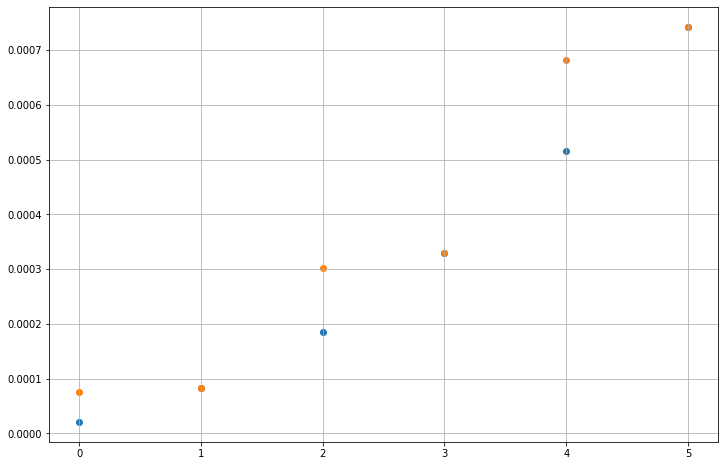

In [141]:
plt.figure(figsize=(12,8))
plt.scatter([0, 1, 2, 3, 4, 5], x_2)
plt.scatter([0, 1, 2, 3, 4, 5], y_2)
plt.grid()